In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді**

- h(x) – передбачене (прогнозоване) значення залежної змінної (наприклад, ціна будинку).
- w0 – коефіцієнт зсуву (intercept, bias), який відповідає за початкове значення (коли x=0).
- w1 – коефіцієнт нахилу (weight, slope), що визначає вплив змінної x на результат.
- x – незалежна змінна (ознака), наприклад, площа будинку.



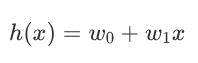

In [28]:
# Відповідь:
def h(X, w):
    return np.dot(X, w)

**2. Створіть функцію для обчислення функції втрат у векторному вигляді**

Функція втрат у векторному вигляді – це спосіб обчислення помилки моделі за допомогою лінійної алгебри, що дозволяє ефективно працювати з великими наборами даних. Найпоширенішою функцією втрат для лінійної регресії є середньоквадратична помилка (Mean Squared Error, MSE).

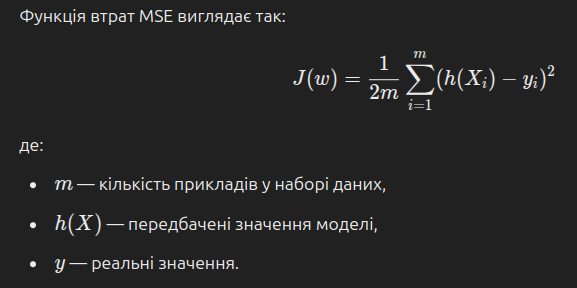

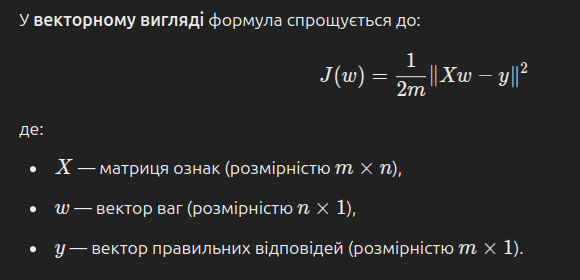

In [29]:
# Відповідь:
def compute_loss(X, y, w):
    m = len(y)
    return (1 / (2 * m)) * np.sum((h(X, w) - y) ** 2)

**3. Реалізуйте один крок градієнтного спуску**

Градієнтний спуск — це метод оптимізації, який використовується для мінімізації функції втрат, поступово оновлюючи параметри моделі.
На кожному кроці ми трошки рухаємося в напрямку, де функція втрат стає меншою. Повторюючи цей процес багато разів, ми знаходимо оптимальні параметри w, які дають найкращий прогноз.

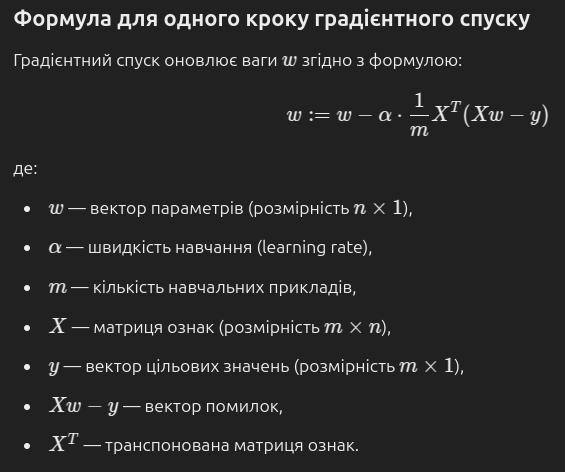

In [30]:
# Відповідь:
def gradient_descent_step(X, y, w, alpha):
    """
    Виконує один крок градієнтного спуску.

    :param X: Матриця ознак (m x n)
    :param y: Вектор цільових значень (m x 1)
    :param w: Вектор параметрів (n x 1)
    :param alpha: Швидкість навчання
    :return: Оновлений вектор w_new
    """
    m = len(y)

    # Обчислення градієнта
    gradient = (1 / m) * np.dot(X.T, (h(X, w) - y))
    # Оновлення ваг
    w_new = w - alpha * gradient

    return w_new

4. Знайдіть найкращі параметри w для датасету Housing.csv використовуючи написані вами функції, прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень.

In [31]:
# Завантаження даних
housing_url = "https://drive.google.com/uc?export=download&id=121TMrVm6n-NYjtD_ocYxsve_UPqXI-FM"
df = pd.read_csv(housing_url)

# Створюємо копію датафрейму, щоб не змінювати оригінальні дані
norm = df.copy()

# Список стовпців, для яких ми будемо виконувати нормалізацію
columns = ['price', 'area', 'bedrooms', 'bathrooms']

# Нормалізація кожного стовпця
for column in columns:
    norm[column] = (df[column] - df[column].mean()) / df[column].std()

# Вибір ознак для моделі: площа, кількість спалень та кількість ванних кімнат
X = norm[['area', 'bedrooms', 'bathrooms']].values

# Цільова змінна для моделі
y = norm['price'].values

# Параметри градієнтного спуску
learning_rate = 0.001
num_iter = 100000
eps = 1e-12

# Функція для обчислення прогнозу
def h(X, w):
    return np.dot(X, w)  # Скаларний добуток матриці X та вектора ваг w

# Функція для обчислення втрат (Mean Squared Error)
def compute_loss(X, y, w):
    predictions = h(np.c_[np.ones(X.shape[0]), X], w)  # Додаємо вільний коефіцієнт і обчислюємо прогноз
    loss = np.mean((predictions - y) ** 2)  # Обчислюємо середньоквадратичну помилку
    return loss

# Функція для одного кроку градієнтного спуску
def gradient_descent_step(X, y, w, learning_rate):
    # Обчислення втрат
    loss = compute_loss(X, y, w)

    # Обчислення градієнта
    predictions = h(np.c_[np.ones(X.shape[0]), X], w)
    gradient = (2 / X.shape[0]) * np.c_[np.ones(X.shape[0]), X].T.dot(predictions - y)

    # Оновлення ваг
    w -= learning_rate * gradient

    return w, loss

# Функція для обчислення градієнтного спуску
def gradient(X, y, learning_rate, num_iter, eps):
    # Ініціалізація ваг (включаючи вільний коефіцієнт)
    w = np.zeros(X.shape[1] + 1)
    loss_history = []

    for i in range(num_iter):
        # Оновлення ваг та обчислення втрат
        w, loss = gradient_descent_step(X, y, w, learning_rate)

        # Додавання втрат до історії
        loss_history.append(loss)

        # Перевірка умови припинення
        if i > 0 and abs(loss_history[-2] - loss_history[-1]) < eps:
            break

    return w, loss_history

# Виконання градієнтного спуску
w, loss_history = gradient(X, y, learning_rate, num_iter, eps)

# Виведення результату
print(f'Gradient Descent: {w.round(4)}')

Gradient Descent: [0.     0.4395 0.1605 0.3723]


5. Знайдіть ці ж параметри за допомогою аналітичного рішення;

In [32]:
ones = np.ones((X.shape[0], 1)) # створення стовпчика такогож розміру, як X (там будуть зберігатись вільні члени)
X = np.hstack((ones, X)) # об'єднання
w_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'Analytical Solution: {w_analytical.round(4)}')

Analytical Solution: [0.     0.4395 0.1605 0.3723]


6. Для перевірки спрогнозованих значень, використайте LinearRegression з бібліотеки scikit-learn та порівняйте результати.

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Додавання стовпця одиничних значень до X
ones = np.ones((X.shape[0], 1))  # створення стовпця, що містить одиничні значення
X_with_ones = np.hstack((ones, X))  # об'єднання

# Обчислення коефіцієнтів за допомогою псевдозворотної матриці
w_analytical = np.linalg.pinv(X_with_ones.T @ X_with_ones) @ X_with_ones.T @ y
print(f'Analytical Solution: {w_analytical.round(4)}')

# Тепер використаємо LinearRegression з scikit-learn для перевірки
model = LinearRegression()

# Навчання моделі на наших даних
model.fit(X, y)

# Отримуємо коефіцієнти з моделі
w_sklearn = np.concatenate(([model.intercept_], model.coef_))

# Виведення результату
print(f'LinearRegression (scikit-learn) Solution: {w_sklearn.round(4)}')

# Прогнозування значень
y_pred_analytical = X_with_ones @ w_analytical
y_pred_sklearn = model.predict(X)

# Виведення кількох прогнозів для перевірки
print(f'Прогноз з аналітичного розв\'язку: {y_pred_analytical[:5].round(4)}')
print(f'Прогноз з scikit-learn: {y_pred_sklearn[:5].round(4)}')


Analytical Solution: [-0.      0.      0.4395  0.1605  0.3723]
LinearRegression (scikit-learn) Solution: [0.     0.     0.4395 0.1605 0.3723]
Прогноз з аналітичного розв'язку: [1.2136 3.0075 1.5104 1.2298 0.4725]
Прогноз з scikit-learn: [1.2136 3.0075 1.5104 1.2298 0.4725]
